Загрузка заранее предобработанного датасета (movies_cleaned.csv).

In [1]:
import pandas as pd
df = pd.read_csv('movies_cleaned.csv')

Вывод первых 20 строк кода с помощью метода head().

In [2]:
df.head(n = 20)

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020,9.0,31180.0,83,documentary,GB
1,Inception,2010,8.8,2268288.0,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599.0,142,drama,US
3,Anbe Sivam,2003,8.7,20595.0,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074.0,87,comedy,US
5,Saving Private Ryan,1998,8.6,1346020.0,169,drama,US
6,Django Unchained,2012,8.4,1472668.0,165,western,US
7,Dangal,2016,8.4,180247.0,161,action,IN
8,Bo Burnham: Make Happy,2016,8.4,14356.0,60,comedy,US
9,Louis C.K.: Hilarious,2010,8.4,11973.0,84,comedy,US


Проведение исследовательского анализа данных. \
Построение точечной диаграммы (матриц диаграмм рассеивания) с использованием библиотеки для построения графиков seaborn. Pairplot показывает отношение между всеми парами переменных.

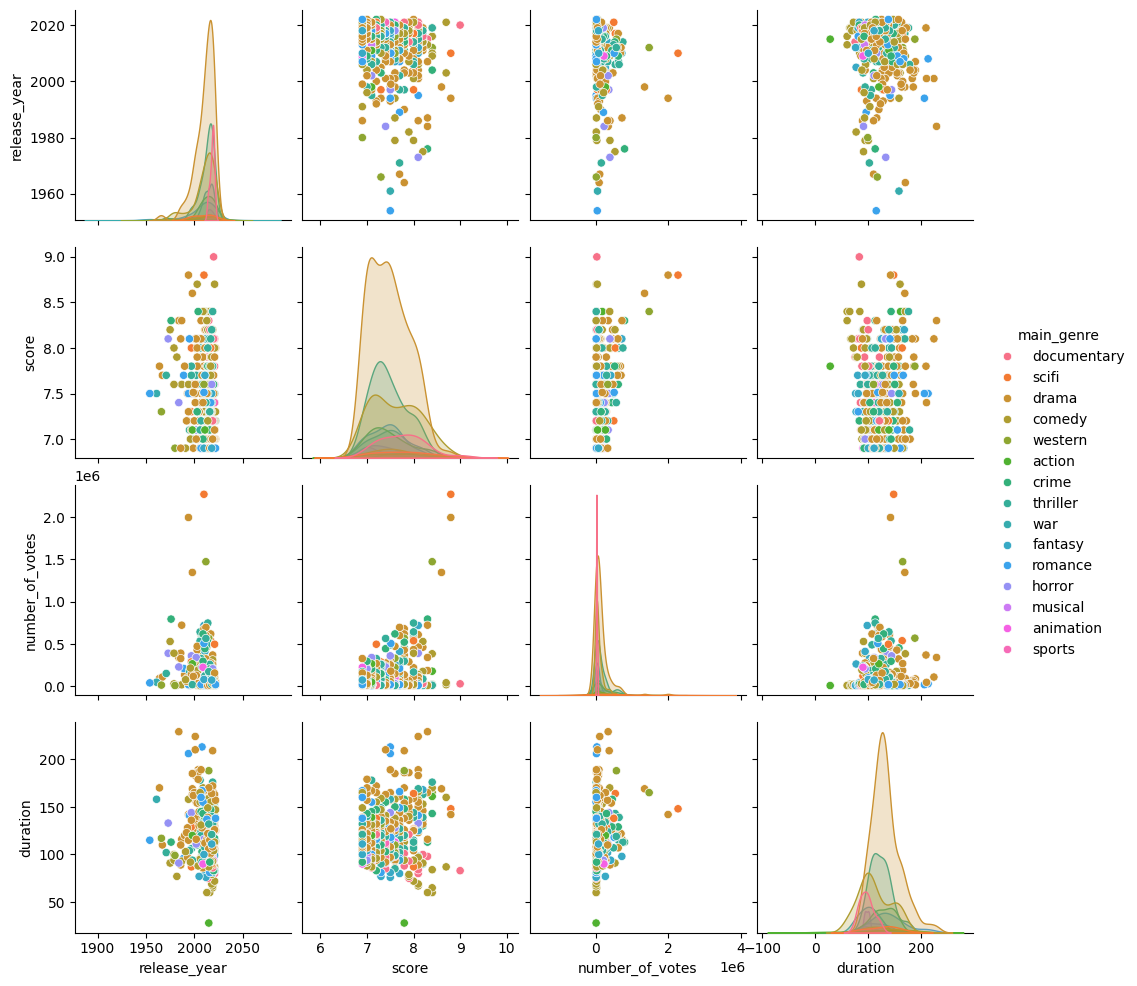

In [3]:
import seaborn as sns
sns.pairplot(df[['release_year', 'score', 'number_of_votes', 'duration', 'main_genre']], hue = 'main_genre')

Первый вывод, что бросается в глаза это концентрация релизов в последние два десятилетия. Большая часть фильмов из выборки вышла после 2000 года, с явным пиком в районе 2010-2020-ых. \
Второй вывод можно сделать о распределении оценок, оно довольно узкое (от 6.9 до 9.0), с максимумом вокруг 7.5. Возможно, в выборку попали только лучшие фильмы, отфильтрованные по рейтингу. Делается вывод, что рассматривается не весь мировой рынок кино, а лишь рейтинговая верхушка. \
Число голосов сильно варьируется. Есть небольшая часть очень популярных фильмов, с очень высоким количеством голосов, но в основном фильмы имеют среднее или малое количество голосов. Это создаёт асимметрию. \
Продолжительность также интересна, большинство фильмов длятся от 90 до 140 минут, что соответствует классической длине полнометражки. Но попадаются фильмы и короче среднего, и длиннее. Видно, как жанр влияет на это. Комедии часто короче, драмы и боевики - длиннее. \
Корреляции довольно слабые. Нельзя сказать, что с ростом длительности растет рейтинг, или что новые фильмы оцениваются как-то особенно высоко. Это подсказывает, что взаимосвязи между этими параметрами, если и есть, то они не линейные и зависят от множества скрытых факторов.



Исследование взаимосвязи между переменными с помощью оценки коэффициента корреляции и ковариации. \
Получение коэффициента корреляции с помощью метода .corr().

In [4]:
df.corr(numeric_only=True)

,release_year,score,number_of_votes,duration
release_year,1.000000,-0.151336,-0.213094,-0.105096
score,-0.151336,1.000000,0.345309,0.125385
number_of_votes,-0.213094,0.345309,1.000000,0.103732
duration,-0.105096,0.125385,0.103732,1.000000


Коэффициент корреляции release_year и score -0.151 указывает на слабую отрицательную связь. Новые фильмы имеют тенденцию получать более низкие оценки по сравнению с более старыми фильмами, но связь незначительная. \
Коэффициент release_year и number_of_votes -0.213 также указывает на слабую отрицательную связь. Это может говорить о том, что более старые фильмы часто набирают больше голосов, возможно, из-за их культового статуса или доверия зрителя к кинематографу тех времен. \
Коэффициент release_year и duration -0.105 показывает очень слабую отрицательную связь. Продолжительность фильмов со временем практически не изменилась, хотя старые фильмы могут быть чуть длиннее. \
Коэффициент score и number_of_votes 0.345 показывает умеренную положительную связь. Фильмы с более высокими оценками, как правило, получают больше голосов, что может объясняться их популярностью или качеством. \
Коэффициент score и duration 0.125 указывает на слабую положительную связь. Более длинные фильмы могут иметь чуть более высокие оценки, но эта зависимость слабая. \
Коэффициент number_of_votes и duration 0.103 указывает на очень слабую положительную связь. Более длинные фильмы могут получать больше голосов, но влияние минимальное. \
Коэффициенты корреляции с остальными переменными показывают, что длительность фильма не сильно зависит от года выпуска, количества голосов или оценки. \
Получение коэффициента ковариации с помощью метода .cov().


In [5]:
df.cov(numeric_only=True)

,release_year,score,number_of_votes,duration
release_year,116.686468,-0.722387,-5.391053e+05,-32.209363
score,-0.722387,0.195270,3.573700e+04,1.571985
number_of_votes,-539105.308490,35737.001910,5.485083e+10,689266.733731
duration,-32.209363,1.571985,6.892667e+05,804.949512


Значение коэффициента release_year и score -0.722 указывает на слабую отрицательную совместную изменчивость. Новые фильмы имеют небольшую тенденцию к снижению рейтинга, но эффект минимален. \
Ковариация release_year и number_of_votes -539105.31 показывает умеренно-отрицательное значение. Более старые фильмы имеют больше голосов, но эффект достаточно сильно масштабирован из-за больших числовых значений голосов. \
Значение release_year и duration -32.21 указывает на очень слабую отрицательную взаимосвязь. Длительность фильмов не сильно меняется в зависимости от года выпуска. \
Значение score и number_of_votes 35737.00 указывает на положительную взаимосвязь. Фильмы с более высокими оценками в среднем получают больше голосов. \
Значение score и duration 1.57 показывает слабую положительную совместную изменчивость. Длинные фильмы немного чаще имеют более высокие оценки, но эффект незначителен. \
Наибольшая ковариация наблюдается между duration и number_of_votes (689266.73), что указывает на то, что более длинные фильмы могут получать больше голосов. \
Построение heatmap с помощью метода heatmap() библиотеки seaborn.

<Axes: >

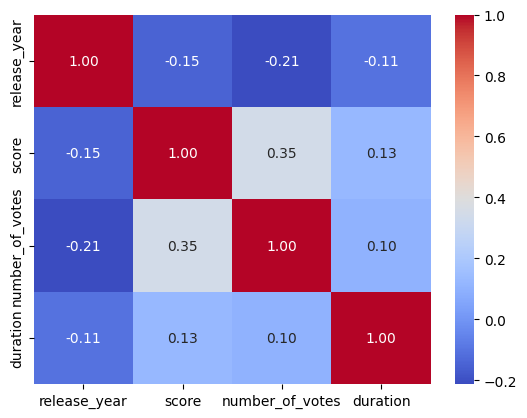

In [35]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

Эта тепловая карта подтверждает наблюдения, сделанные выше:
*   Существует умеренная положительная корреляция между оценкой (score) и количеством голосов (number_of_votes) (0.35), что может указывать на то, что фильмы с большим количеством голосов, как правило, имеют более высокие оценки;
*   Отрицательные корреляции со временем выхода (release_year) (-0.15) и длительностью (duration) (-0.11) показывают, что более новые фильмы могут иметь чуть более низкие оценки, хотя это значение и не сильно выражено;
*   Длительность фильма не имеет значимой корреляции ни с одной из других переменных, что говорит о том, что время показа фильма не влияет на его оценку или количество голосов.





Исследование распределения фильмов по жанрам среди тех, что вышли с 2020 года, анализ, какие жанры оказались наиболее активными в последние годы. \
Фильтрация датафрейма по столбцу 'release_year'. Вывод отфильрованного датафрейма.

In [7]:
filtered_df = df[df['release_year'] >= 2020]
filtered_df

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020,9.0,31180.0,83,documentary,GB
4,Bo Burnham: Inside,2021,8.7,44074.0,87,comedy,US
38,Minnal Murali,2021,8.1,24681.0,158,action,IN
40,Seaspiracy,2021,8.1,29604.0,80,documentary,US
51,My Octopus Teacher,2020,8.1,51232.0,84,documentary,ZA
58,Dasvi,2022,8.0,13140.0,125,drama,IN
74,Dave Chappelle: The Closer,2021,8.0,24903.0,72,comedy,US
88,Shyam Singha Roy,2021,7.9,10903.0,157,drama,IN
104,14 Peaks: Nothing Is Impossible,2021,7.8,22858.0,101,documentary,US
128,The Trial of the Chicago 7,2020,7.7,170728.0,130,drama,US


Группировка по году выхода и жанру, подсчет количества фильмов. Вывод группированного датафрейма.

In [8]:
group_df = filtered_df.groupby(['release_year', 'main_genre']).size().reset_index(name='count')
group_df

,release_year,main_genre,count
0,2020,comedy,1
1,2020,crime,2
2,2020,documentary,4
3,2020,drama,9
4,2020,musical,1
5,2020,thriller,2
6,2021,action,1
7,2021,animation,1
8,2021,comedy,4
9,2021,crime,2


Создание столбчатой диаграммы с помощью библиотеки seaborn и метода sns.barplot(). Вывод диаграммы.

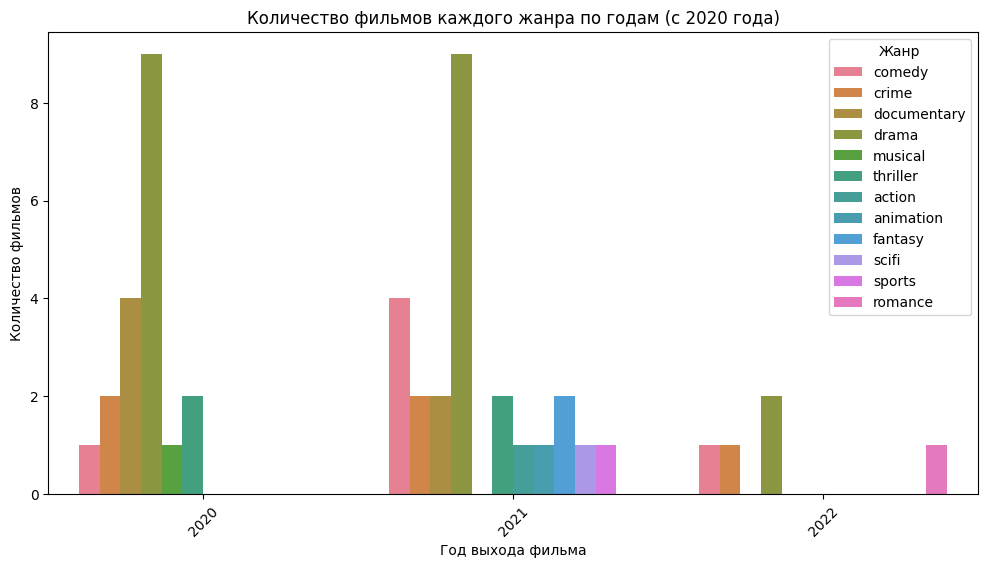

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(data=group_df, x='release_year', y='count', hue='main_genre')
plt.title('Количество фильмов каждого жанра по годам (с 2020 года)')
plt.xlabel('Год выхода фильма')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.legend(title='Жанр')
plt.show()

На графике показано, как с 2020 года менялось количество фильмов в разных жанрах. Видно, что в 2020 и 2021 годах есть два пика активности, в частности по жанру драма, он доминирует среди всех остальных два года подряд. Есть предположение, что на это могла повлиять пандемия и карантинное время 2020-2021-ых годов. \
Документальные фильмы и комедии тоже представлены стабильно, в 2020 и 2021 году они выходили регулярно. Причём в 2021 году комедий было особенно много. Если посмотреть на остальные жанры, то видно, что криминал, триллер, боевик и фантастика имеют небольшое присутствие. \
Практически пустым оказался 2022 год, по одной-две записи, в том числе редкие жанры вроде sports и romance. Это может говорить о том, что данные на этот год еще не успели накопиться или по рейтингу новые фильмы не попали в исходный датасет. \
Также видно, что некоторые жанры, такие как musical, romance, animation, представлены только один раз за весь период. Возможно, данные жанры просто были проигнорированы в выборке, важно понимать, откуда датасет взят и по каким критериям он собран.

Исследование среднего рейтинга фильмов по жанрам \
Создание сводной таблицы. Вывод сводной таблицы.

In [10]:
pivot_table = df.pivot_table(values='score', index='main_genre', aggfunc='mean')
pivot_table

,score
main_genre,
action,7.700000
animation,7.200000
comedy,7.608621
crime,7.466667
documentary,7.760000
drama,7.478969
fantasy,7.484211
horror,7.350000
musical,7.100000


Построение графика с помощью метода plot(). Вывод графика.

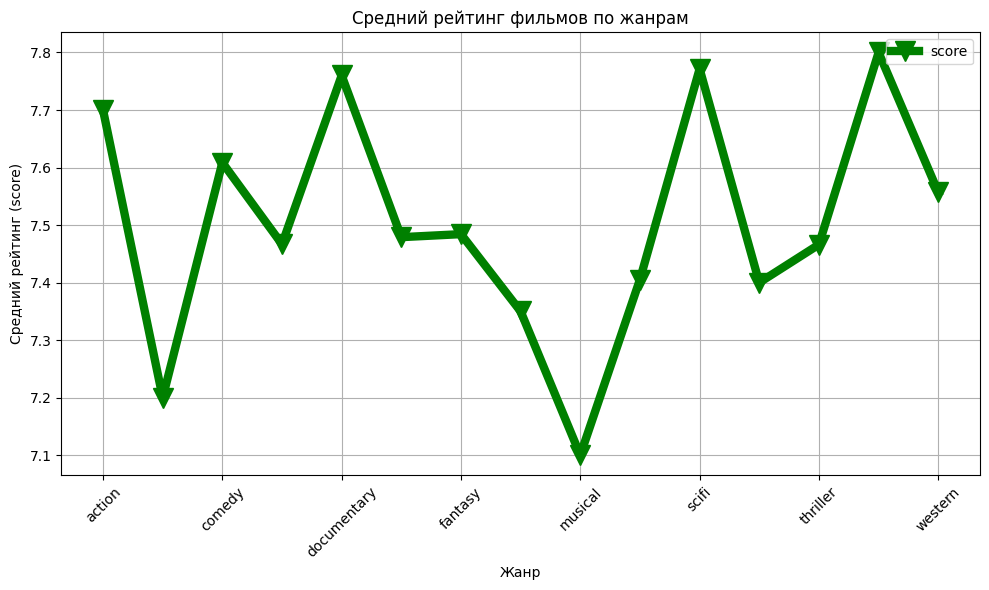

In [11]:
ax = pivot_table.plot(kind='line', marker='v', markersize=14, linewidth=6, color='green', figsize=(10, 6))
ax.set_title('Средний рейтинг фильмов по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Средний рейтинг (score)')
ax.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

График показывает средний рейтинг (score) фильмов для различных жанров. Жанры с самым высоким средним рейтингом - western и scifi - оба жанра имеют наивысший средний рейтинг (7.8). Это указывает на высокую оценку зрителями фильмов данных жанров. Жанр action также имеет высокий рейтинг (7.7), что свидетельствует о его популярности. Жанр musical имеет самый низкий средний рейтинг (7.1). Это может говорить о том, что фильмы этого жанра получают менее приятные отзывы. Жанр fantasy второй по низкому рейтингу (7.3), что указывает на умеренное восприятие этого жанра. Жанры имеющие средний рейтинг documentary, comedy, и thriller. Средний рейтинг варьируется от 7.4 до 7.6. Эти жанры имеют стабильную, но не сильную популярность. \
Построение круговой диаграммы, отражающей распределение фильмов по жанрам (main_genre), среди фильмов, вышедших с 2020 года. \
Фильтрация данных по году выхода. Вывод отфильтрованного датафрейма.

In [12]:
filtered_df1 = df[df['release_year'] >= 2020]
filtered_df1

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020,9.0,31180.0,83,documentary,GB
4,Bo Burnham: Inside,2021,8.7,44074.0,87,comedy,US
38,Minnal Murali,2021,8.1,24681.0,158,action,IN
40,Seaspiracy,2021,8.1,29604.0,80,documentary,US
51,My Octopus Teacher,2020,8.1,51232.0,84,documentary,ZA
58,Dasvi,2022,8.0,13140.0,125,drama,IN
74,Dave Chappelle: The Closer,2021,8.0,24903.0,72,comedy,US
88,Shyam Singha Roy,2021,7.9,10903.0,157,drama,IN
104,14 Peaks: Nothing Is Impossible,2021,7.8,22858.0,101,documentary,US
128,The Trial of the Chicago 7,2020,7.7,170728.0,130,drama,US


Подсчет количества фильмов по жанрам, вывод.

In [13]:
genre_counts = filtered_df['main_genre'].value_counts()
genre_counts

,count
main_genre,
drama,20
documentary,6
comedy,6
crime,5
thriller,4
fantasy,2
action,1
animation,1
sports,1


Построение круговой диаграммы. Вывод диаграммы.

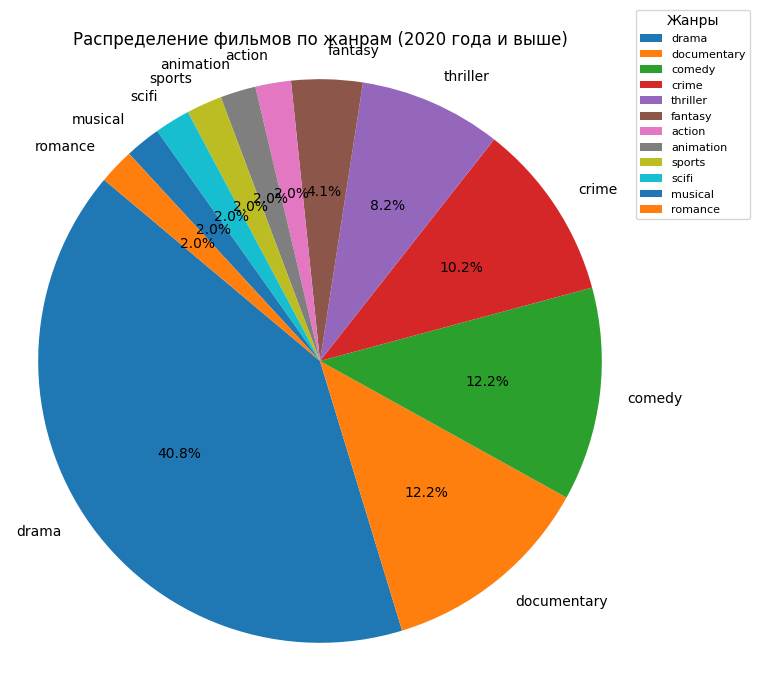

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Распределение фильмов по жанрам (2020 года и выше)')
plt.legend(genre_counts.index, title="Жанры", loc="center left", fontsize = 8, bbox_to_anchor=(1, 0.9))
plt.axis('equal')
plt.show()

Доминирование жанра drama - 40.8% всех фильмов приходится на этот жанр. Это самый распространённый жанр среди выпущенных фильмов. Жанры комедия (comedy) и документальные фильмы (documentary) занимают по 12.2%. Это указывает на значительный интерес к развлекательным и познавательным фильмам. Криминальные фильмы (жанр crime) составляют 10.2%. Триллеры (thriller) занимают 8.2%, что говорит о их умеренной популярности. Фэнтези (fantasy) имеет долю 4.1%, занимая среднюю позицию. Наименее распространённые жанры - романтика (romance), мюзиклы (musical), научная фантастика (scifi), спорт(sports), анимация (animation), боевики (action). \
Драма доминирует среди жанров, выпущенных после 2020 года, что может отражать предпочтения как производителей, так и зрителей. Сравнительно высокие доли документальных и комедийных фильмов указывают на их востребованность и популярность. Меньшая представленность жанров, таких как анимация, спорт и романтика, может свидетельствовать о менее активном производстве фильмов этих направлений.




Выборка топ 5 жанров по среднему рейтингу. Определение выбросов и устранение их.

In [15]:
top_genres1 = df.groupby('main_genre')['score'].mean().nlargest(5).index
top_genres_df = df[df['main_genre'].isin(top_genres1)]
top_genres_df

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020,9.0,31180.0,83,documentary,GB
1,Inception,2010,8.8,2268288.0,148,scifi,GB
3,Anbe Sivam,2003,8.7,20595.0,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074.0,87,comedy,US
7,Dangal,2016,8.4,180247.0,161,action,IN
...,...,...,...,...,...,...,...
359,Then Came You,2019,6.9,12356.0,93,comedy,US
371,My Girl,1991,6.9,79800.0,103,comedy,US
373,2 States,2014,6.9,25344.0,149,comedy,IN
375,The Half of It,2020,6.9,34959.0,104,comedy,US


Boxplot для среднего рейтинга по жанрам реализован с использованием библиотеки matplotlib.

/tmp/ipython-input-17-1044485638.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([top_genres_df[top_genres_df['main_genre'] == genre]['score'] for genre in top_genres1],


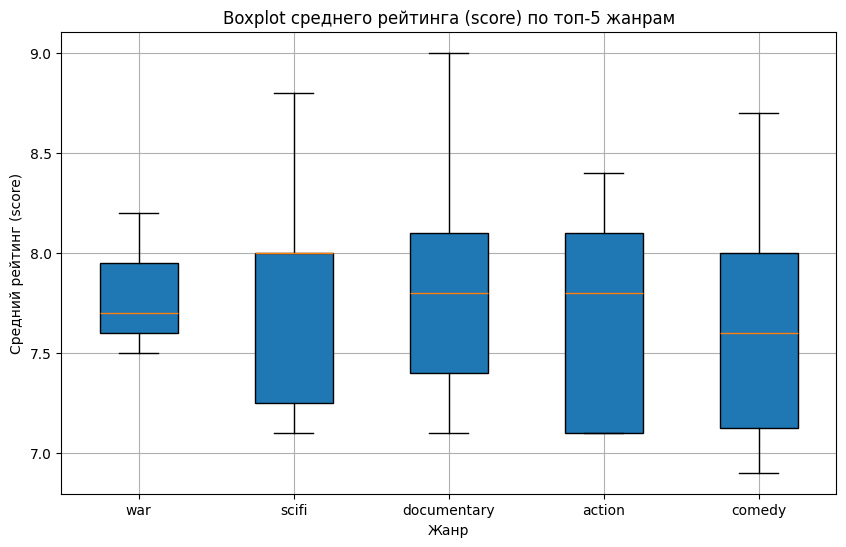

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot([top_genres_df[top_genres_df['main_genre'] == genre]['score'] for genre in top_genres1],
            labels=top_genres1, patch_artist=True)
plt.title('Boxplot среднего рейтинга (score) по топ-5 жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средний рейтинг (score)')
plt.grid()
plt.show()

Все значения рейтингов у жанров war, scifi, documentary, action и comedy укладываются в границы обычного разброса (без экстремально высоких или низких значений). Выбросов не было обнаружено. \
Boxplot для количества голосов  с использованием pandas. Используется метод boxplot() встроенный в pandas для построения графика. Для улучшения просматриваемости графика используются методы библиотеки matplotlib.pyplot.

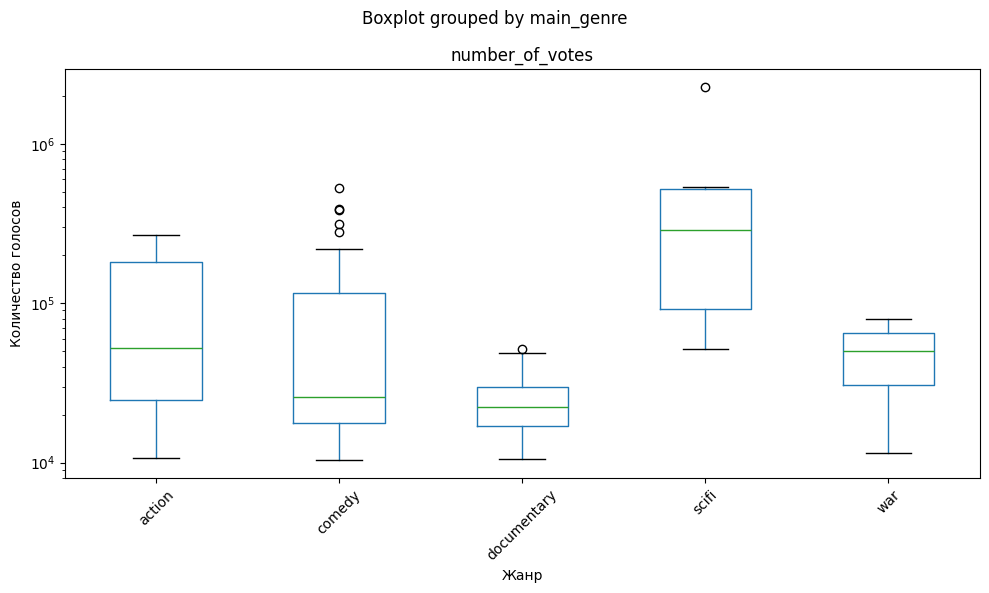

In [18]:
top_genres_df.boxplot(column='number_of_votes', by='main_genre', figsize=(10, 6), grid=False)
plt.yscale('log')
plt.xlabel('Жанр')
plt.ylabel('Количество голосов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В жанре Comedy обнаружено много выбросов. Это те фильмы, которые набрали исключительно много голосов по сравнению с остальными в своём жанре. В жанре Documentary тоже есть 1 выброс. В жанре Scifi огромные выбросы в верхней части. В жанрах Action, War выбросов не было обнаружено, данные распределены компактно. \
Поиск и удаление выбросов. \
Поиск выбросов в столбце release_year с помощью процентилей.
При помощи метода quantile получение соответствующей нижней и верхней границы, вывод того, что выходит за их рамки.  

In [19]:
cleaned_df = top_genres_df.copy()
lower_bound_year = cleaned_df['release_year'].quantile(0.025)
upper_bound_year = cleaned_df['release_year'].quantile(0.975)
cleaned_df[(cleaned_df.release_year < lower_bound_year) | (cleaned_df.release_year > upper_bound_year)]

,title,release_year,score,number_of_votes,duration,main_genre,main_production
28,Monty Python and the Holy Grail,1975,8.2,530877.0,91,comedy,GB
183,The Guns of Navarone,1961,7.5,50150.0,158,war,US
246,Badhaai Do,2022,7.3,15032.0,147,comedy,IN


Поиск выбросов в столбце score с помощью процентилей.
При помощи метода quantile получение соответствующей нижней и верхней границы, вывод того, что выходит за их рамки.

In [20]:
lower_bound_score = cleaned_df.score.quantile(q=0.025)
upper_bound_score = cleaned_df.score.quantile(q=0.975)
cleaned_df[(cleaned_df.score < lower_bound_score) | (cleaned_df.score > upper_bound_score)]

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020,9.0,31180.0,83,documentary,GB
1,Inception,2010,8.8,2268288.0,148,scifi,GB


Поиск выбросов в столбце number_of_votes с помощью процентилей. При помощи метода quantile получение соответствующей нижней и верхней границы, затем вывод того, что выходит за их рамки.

In [21]:
lower_bound_votes = cleaned_df['number_of_votes'].quantile(0.25) - 1.5 * (cleaned_df['number_of_votes'].quantile(0.75) - cleaned_df['number_of_votes'].quantile(0.25))
upper_bound_votes = cleaned_df['number_of_votes'].quantile(0.75) + 1.5 * (cleaned_df['number_of_votes'].quantile(0.75) - cleaned_df['number_of_votes'].quantile(0.25))
cleaned_df[(cleaned_df.number_of_votes < lower_bound_votes) | (cleaned_df.number_of_votes > upper_bound_votes)]

,title,release_year,score,number_of_votes,duration,main_genre,main_production
1,Inception,2010,8.8,2268288.0,148,scifi,GB
11,3 Idiots,2009,8.4,385782.0,170,comedy,IN
28,Monty Python and the Holy Grail,1975,8.2,530877.0,91,comedy,GB
72,Life of Brian,1979,8.0,392419.0,94,comedy,GB
75,Blade Runner 2049,2017,8.0,539864.0,164,scifi,CA
97,The Gentlemen,2019,7.8,314049.0,113,comedy,US
228,Starship Troopers,1997,7.3,288960.0,129,scifi,US
267,Don't Look Up,2021,7.2,498447.0,138,scifi,US
292,Forgetting Sarah Marshall,2008,7.1,280121.0,111,comedy,US
319,Blade,1998,7.1,267181.0,120,action,US


Поиск выбросов в столбце duration с помощью процентилей. При помощи метода quantile получение соответствующей нижней и верхней границы, затем вывод того, что выходит за их рамки.

In [22]:
lower_bound_duration = cleaned_df.duration.quantile(q=0.025)
upper_bound_duration = cleaned_df.duration.quantile(q=0.975)
cleaned_df[(cleaned_df.duration < lower_bound_duration) | (cleaned_df.duration > upper_bound_duration)]

,title,release_year,score,number_of_votes,duration,main_genre,main_production
8,Bo Burnham: Make Happy,2016,8.4,14356.0,60,comedy,US
11,3 Idiots,2009,8.4,385782.0,170,comedy,IN
18,Bo Burnham: What.,2013,8.3,11488.0,60,comedy,US
45,Zindagi Na Milegi Dobara,2011,8.1,75801.0,166,comedy,IN
98,Marco Polo: One Hundred Eyes,2015,7.8,10742.0,28,action,US
358,Chup Chup Ke,2006,6.9,10528.0,165,comedy,IN


Замена значений выбросов, найденных выше, на значения границ квартилей.

In [23]:
import numpy as np
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
cleaned_df = cap_outliers(cleaned_df, 'number_of_votes', lower_bound_votes, upper_bound_votes)
cleaned_df = cap_outliers(cleaned_df, 'release_year', lower_bound_year, upper_bound_year)
cleaned_df = cap_outliers(cleaned_df, 'score', lower_bound_score, upper_bound_score)
cleaned_df = cap_outliers(cleaned_df, 'duration', lower_bound_duration, upper_bound_duration)

Повторная проверка на выбросы.

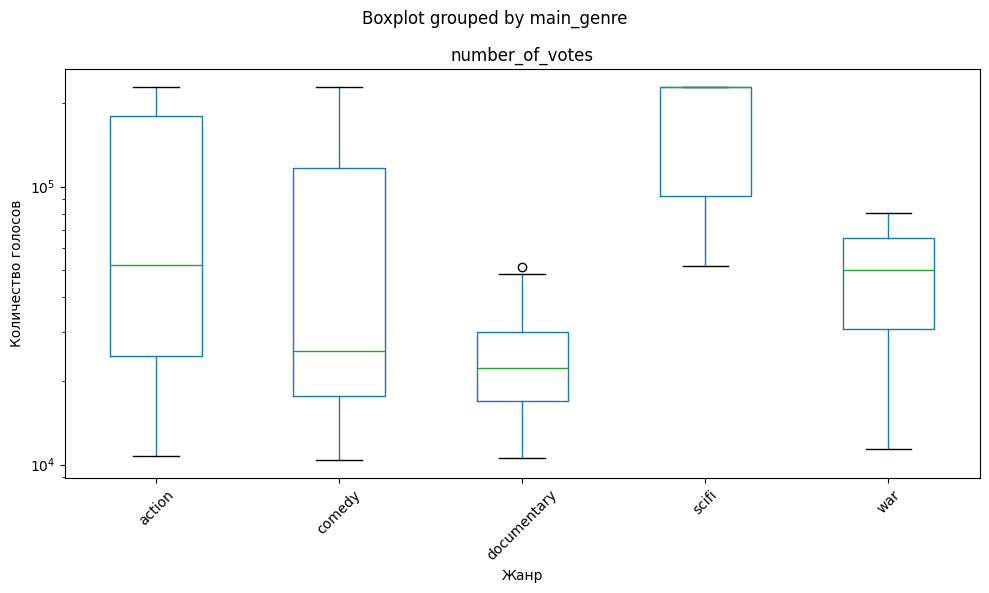

In [34]:
cleaned_df.boxplot(column='number_of_votes', by='main_genre', figsize=(10, 6), grid=False)
plt.yscale('log')
plt.xlabel('Жанр')
plt.ylabel('Количество голосов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Очищены почти все выбросы.